## 1. Importowanie bibliotek, wczytanie danych, przygotowanie danych

### 1.1 Import bibliotek

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                            precision_score, recall_score, f1_score,
                            confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Wczytanie danych

In [2]:
# Wczytanie danych
df = pd.read_csv("https://www.openml.org/data/get_csv/16826755", na_values='?')
# df = pd.read_csv("titanic.csv", na_values='?')

# Preprocessing
cols = ['pclass', 'age', 'sex', 'sibsp', 'parch', 'ticket', 'fare',
        'cabin', 'embarked', 'name', 'boat', 'body', 'home.dest', 'survived']

df = df[cols]

### 1.3 Przygotowanie danych

In [3]:
# Wstępna standaryzacja nazw kolumn
df = df.rename(columns={
    "pclass": "PClass", "age": "Age", "sex": "Sex",
    "sibsp": "SibSp", "parch": "Parch", "ticket": "Ticket",
    "fare": "Fare", "cabin": "Cabin", "embarked": "Embarked",
    "name": "Name", "boat": "Boat", "body": "Body",
    "home.dest": "Home_Dest", "survived": "Survived"
})

display(df.head())

,PClass,Age,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name,Boat,Body,Home_Dest,Survived
0,1,29.0000,female,0,0,24160,211.3375,B5,S,"Allen, Miss. Elisabeth Walton",2,NaN,"St Louis, MO",1
1,1,0.9167,male,1,2,113781,151.5500,C22 C26,S,"Allison, Master. Hudson Trevor",11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,2.0000,female,1,2,113781,151.5500,C22 C26,S,"Allison, Miss. Helen Loraine",NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,30.0000,male,1,2,113781,151.5500,C22 C26,S,"Allison, Mr. Hudson Joshua Creighton",NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,25.0000,female,1,2,113781,151.5500,C22 C26,S,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## 2. Eksploracyjna analiza danych (EDA)

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PClass     1309 non-null   int64  
 1   Age        1046 non-null   float64
 2   Sex        1309 non-null   object 
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Ticket     1309 non-null   object 
 6   Fare       1308 non-null   float64
 7   Cabin      295 non-null    object 
 8   Embarked   1307 non-null   object 
 9   Name       1309 non-null   object 
 10  Boat       486 non-null    object 
 11  Body       121 non-null    float64
 12  Home_Dest  745 non-null    object 
 13  Survived   1309 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


None

### 2.1 Analiza braków danych

In [5]:
def list_missing(df):
    missing_data = df.isnull().sum()
    missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False).round(2)

    missing_df = pd.DataFrame({
        'Liczba braków': missing_data,
        'Procent (%)': missing_percent
    })

    return missing_df[missing_df['Liczba braków'] > 0]

display(list_missing(df))

,Liczba braków,Procent (%)
Age,263,20.09
Boat,823,62.87
Body,1188,90.76
Cabin,1014,77.46
Embarked,2,0.15
Fare,1,0.08
Home_Dest,564,43.09


### 2.2 Analiza zmiennej docelowej

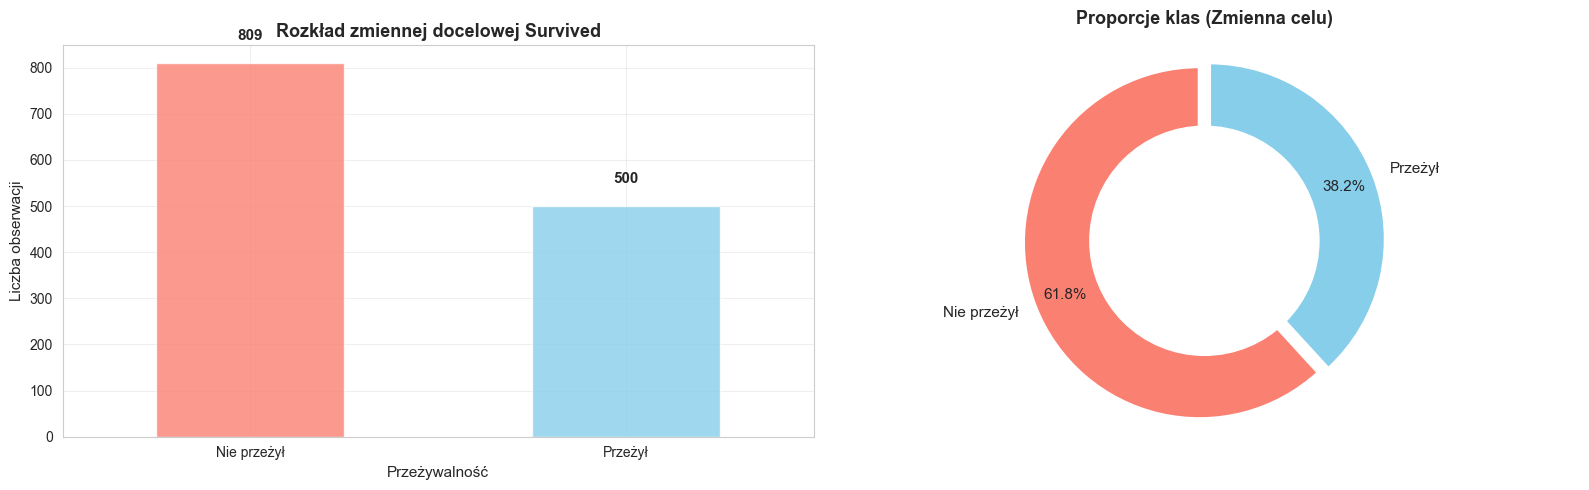

In [6]:
# Wizualizacja rozkładu zmiennej docelowej
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

target_counts = df['Survived'].value_counts()

# Wykres słupkowy
target_counts.plot(kind='bar', ax=axes[0], color=['salmon', 'skyblue'], alpha=0.8)
axes[0].set_title('Rozkład zmiennej docelowej Survived', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Przeżywalność', fontsize=11)
axes[0].set_ylabel('Liczba obserwacji', fontsize=11)
axes[0].set_xticklabels(['Nie przeżył', 'Przeżył'], rotation=0)
axes[0].grid(alpha=0.3)
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold', fontsize=11)

counts_sorted = target_counts.sort_index()

labels = ['Nie przeżył', 'Przeżył']
colors = ['salmon', 'skyblue']
explode = (0.03, 0.03)

# Wykres kołowy
wedges, texts, autotexts = axes[1].pie(
    counts_sorted,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=explode,
    pctdistance=0.82,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2.5}
)

centre_circle = plt.Circle((0,0), 0.65, fc='white')
axes[1].add_artist(centre_circle)

axes[1].set_title('Proporcje klas (Zmienna celu)', fontsize=13, fontweight='bold', pad=15)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

### 2.3 Analiza pozostałych zmiennych

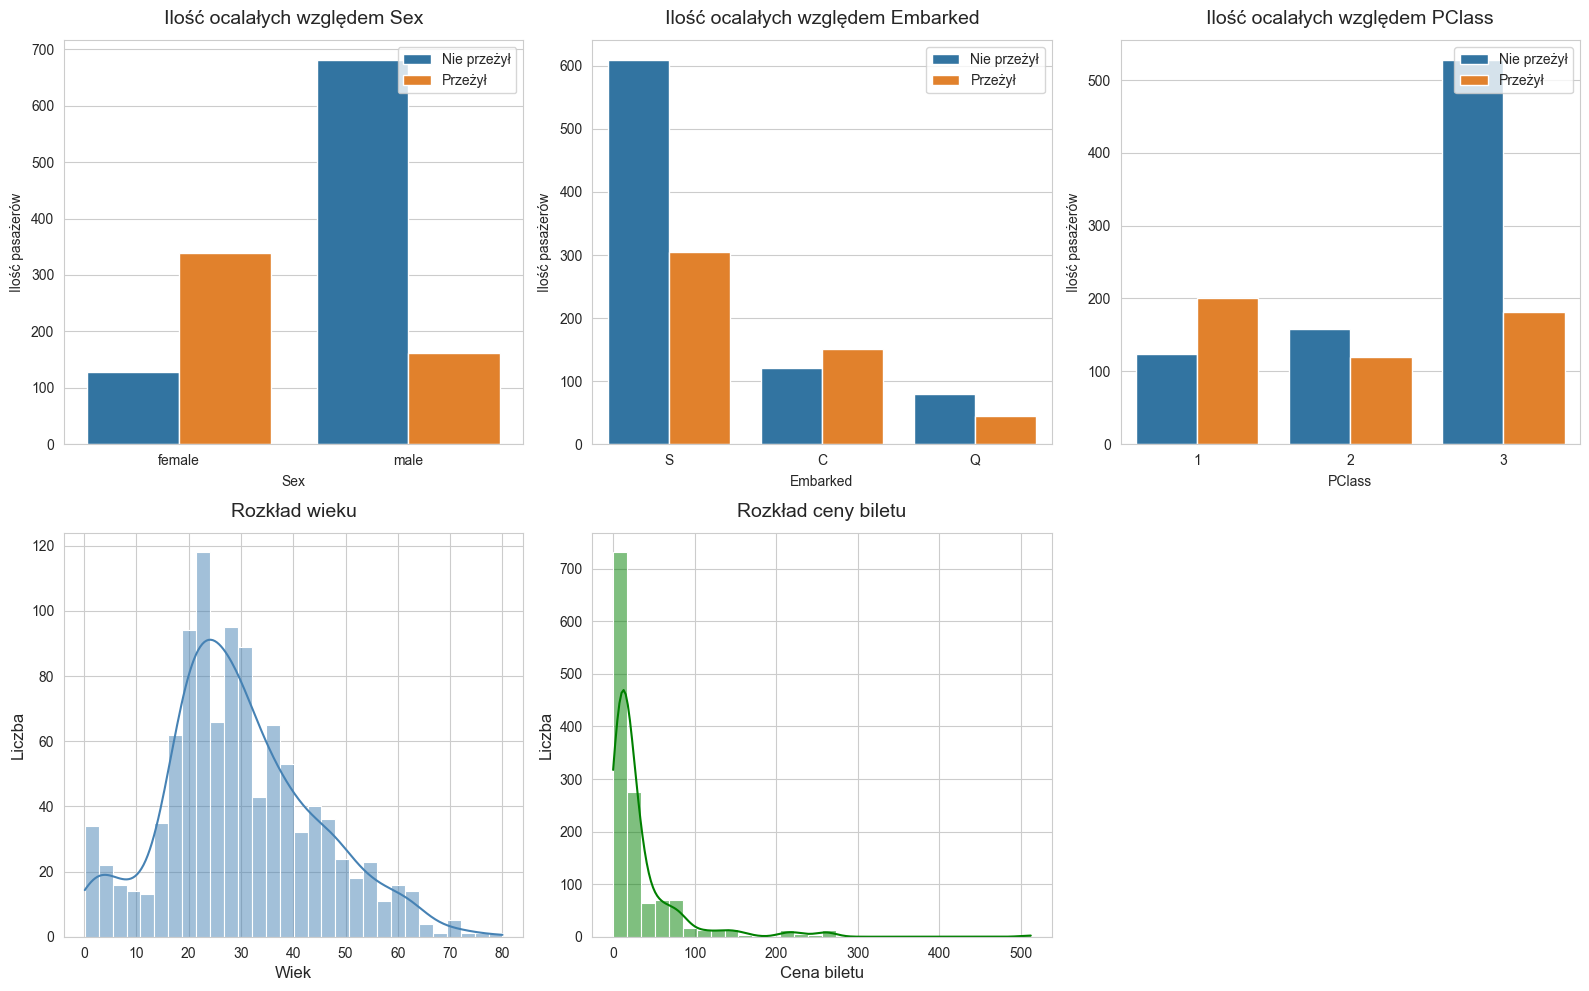

In [7]:
cat_features = ['Sex', 'Embarked', 'PClass']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    clean_data = df.dropna(subset=[feature])

    sns.countplot(x=feature, hue='Survived', data=clean_data, ax=axes[i])

    axes[i].set_xlabel('{}'.format(feature), size=10, labelpad=5)
    axes[i].set_ylabel('Ilość pasażerów', size=10, labelpad=5)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    if axes[i].get_legend():
        axes[i].legend(['Nie przeżył', 'Przeżył'], loc='upper right', prop={'size': 10})
    axes[i].set_title('Ilość ocalałych względem {}'.format(feature), size=14, y=1.02)

sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='steelblue', ax=axes[3])
axes[3].set_title('Rozkład wieku', size=14, y=1.02)
axes[3].set_xlabel('Wiek', size=12)
axes[3].set_ylabel('Liczba', size=12)

sns.histplot(df['Fare'].dropna(), kde=True, bins=30, color='green', ax=axes[4])
axes[4].set_title('Rozkład ceny biletu', size=14, y=1.02)
axes[4].set_xlabel('Cena biletu', size=12)
axes[4].set_ylabel('Liczba', size=12)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

 ## 3. Inżynieria cech i przygotowanie danych

In [8]:
# Usunięcie niepotrzebnych danych
cols_to_drop = ['Boat', 'Body', 'Home_Dest', 'Ticket']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')

# Ekstrakcja tytułu z imienia
df['Title'] = df.Name.str.extract(r',\s*([^\.]+)\.', expand=False)

# Obliczenie rozmiaru rodziny
df["Family.Size"] = df["Parch"] + df["SibSp"] + 1

# Ekstrakcja pierwszej litery kabiny (pokład)
df["Deck"] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) and s != 'nan' else 'M')

# Dyskretyzacja opłaty na 8 kategorii
df['CategoricalFare'] = pd.qcut(df['Fare'], 8)

# Interakcja między klasą a wiekiem
df["MPC"] = df["PClass"] * df["Age"]

### 3.1 Zmiana typów

In [9]:
# Zmiana typów
df["Name"] = df["Name"].astype(str)
df["Sex"] = df["Sex"].astype(str)
df["Embarked"] = df["Embarked"].astype(str)
df["Cabin"] = df["Cabin"].astype(str)

### 3.2 Uzupełnienie braków danych

In [10]:
# Uzupełnienie wieku średnią w grupie według tytułu
df['Age'] = df['Age'].fillna(df.groupby("Title")['Age'].transform("mean"))

# Uzupełnienie portu najczęstszą wartością
df['Embarked'] = df['Embarked'].fillna('S')

# Uzupełnienie opłaty medianą
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

### 3.3 Kategoryzowanie kolumny wieku

In [11]:
# Definicja warunków dla grup wiekowych
conditions = [
    (df["Age"] <= 6),
    (df["Age"] > 6) & (df["Age"] <= 12),
    (df["Age"] > 12) & (df["Age"] <= 18),
    (df["Age"] > 18)
]
values = [0, 1, 2, 3]  # Bobas, Dzieciak, Nastolatek, Dorosły
df["Age.Range"] = np.select(conditions, values)

### 3.4 Ograniczenie wartości odstających

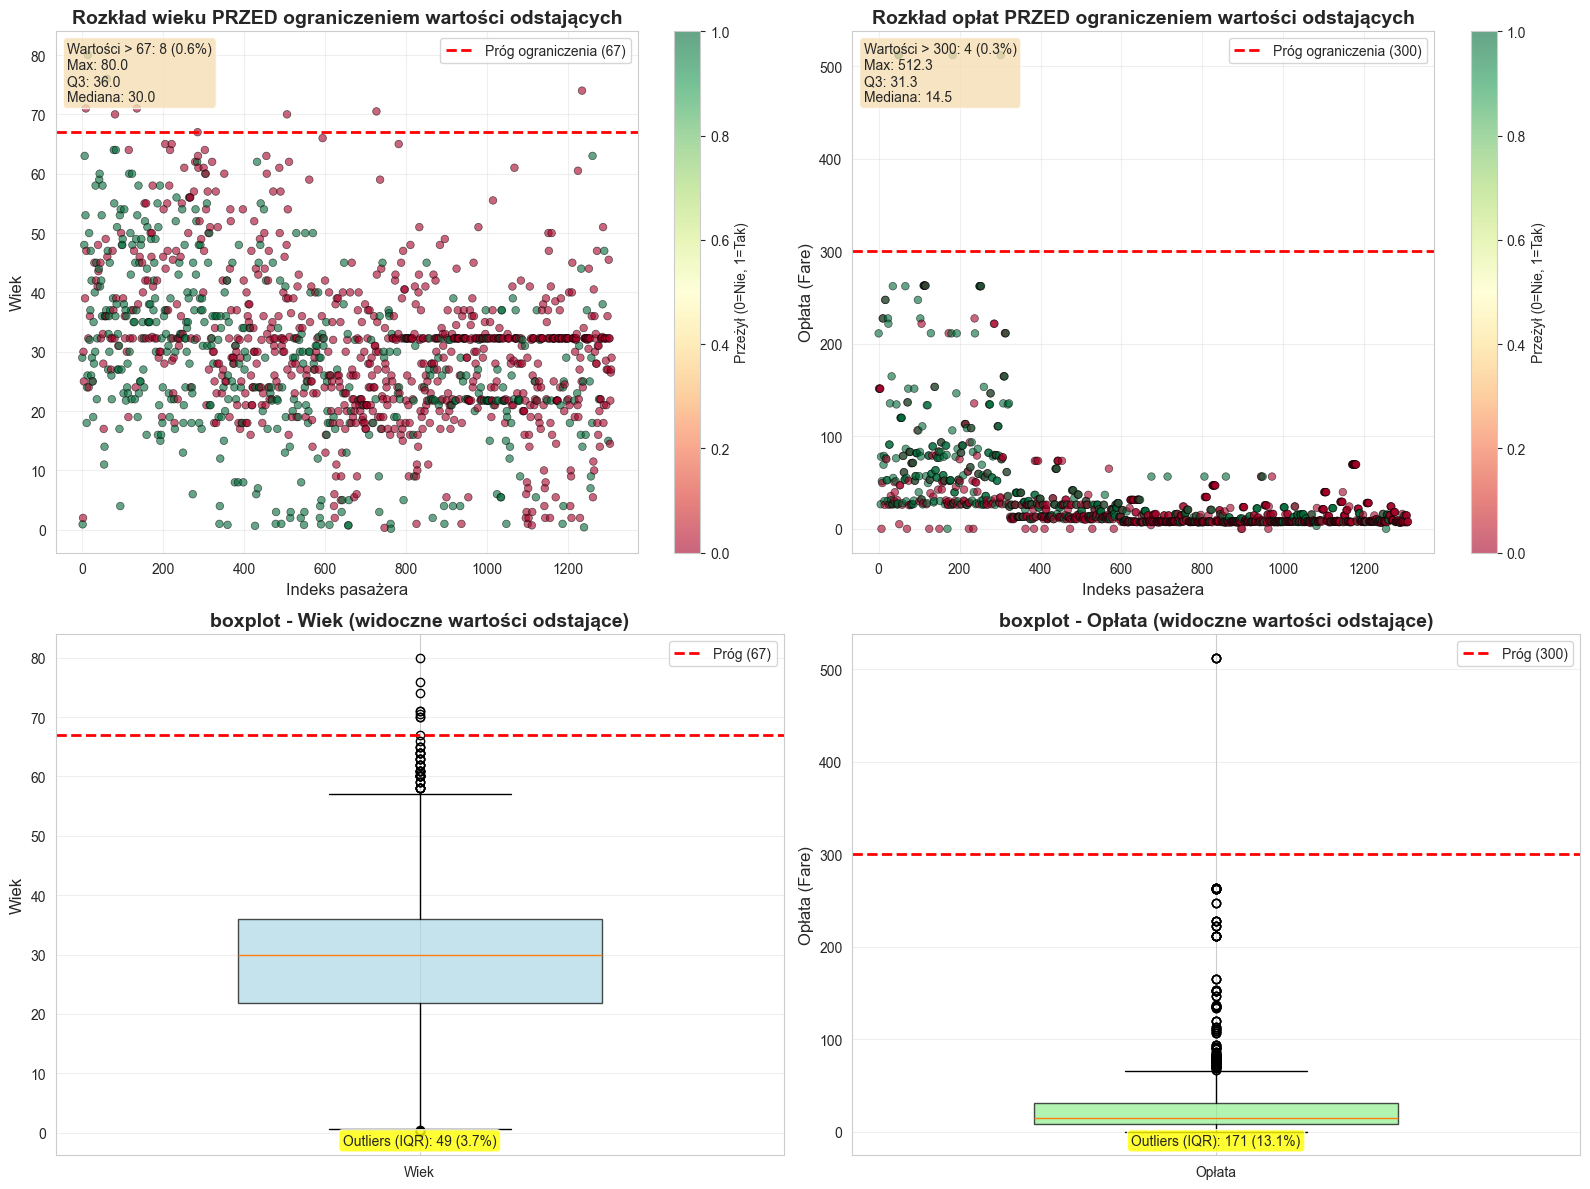

In [12]:
# Tworzenie figury z wykresami
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Wykres punktowy Age - przed ograniczeniem
ax1 = axes[0, 0]
scatter1 = ax1.scatter(range(len(df)), df['Age'],
                       c=df['Survived'], cmap='RdYlGn',
                       alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax1.axhline(y=67, color='red', linestyle='--', linewidth=2, label='Próg ograniczenia (67)')
ax1.set_xlabel('Indeks pasażera', fontsize=12)
ax1.set_ylabel('Wiek', fontsize=12)
ax1.set_title('Rozkład wieku PRZED ograniczeniem wartości odstających', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Przeżył (0=Nie, 1=Tak)')

# Statystyki dla Age
age_outliers = df[df['Age'] > 67]
ax1.text(0.02, 0.98, f'Wartości > 67: {len(age_outliers)} ({len(age_outliers)/len(df)*100:.1f}%)\n'
                     f'Max: {df["Age"].max():.1f}\n'
                     f'Q3: {df["Age"].quantile(0.75):.1f}\n'
                     f'Mediana: {df["Age"].median():.1f}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. Wykres punktowy Fare - przed ograniczeniem
ax2 = axes[0, 1]
scatter2 = ax2.scatter(range(len(df)), df['Fare'],
                       c=df['Survived'], cmap='RdYlGn',
                       alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax2.axhline(y=300, color='red', linestyle='--', linewidth=2, label='Próg ograniczenia (300)')
ax2.set_xlabel('Indeks pasażera', fontsize=12)
ax2.set_ylabel('Opłata (Fare)', fontsize=12)
ax2.set_title('Rozkład opłat PRZED ograniczeniem wartości odstających', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='Przeżył (0=Nie, 1=Tak)')

# Statystyki dla Fare
fare_outliers = df[df['Fare'] > 300]
ax2.text(0.02, 0.98, f'Wartości > 300: {len(fare_outliers)} ({len(fare_outliers)/len(df)*100:.1f}%)\n'
                     f'Max: {df["Fare"].max():.1f}\n'
                     f'Q3: {df["Fare"].quantile(0.75):.1f}\n'
                     f'Mediana: {df["Fare"].median():.1f}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Boxplot Age
ax3 = axes[1, 0]
box1 = ax3.boxplot([df['Age']], vert=True, patch_artist=True,
                    tick_labels=['Wiek'], widths=0.5)
box1['boxes'][0].set_facecolor('lightblue')
box1['boxes'][0].set_alpha(0.7)
ax3.axhline(y=67, color='red', linestyle='--', linewidth=2, label='Próg (67)')
ax3.set_ylabel('Wiek', fontsize=12)
ax3.set_title('boxplot - Wiek (widoczne wartości odstające)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# Oznaczenie wartości odstających
outliers_age = df[df['Age'] > df['Age'].quantile(0.75) + 1.5 * (df['Age'].quantile(0.75) - df['Age'].quantile(0.25))]
ax3.text(0.5, 0.02, f'Outliers (IQR): {len(outliers_age)} ({len(outliers_age)/len(df)*100:.1f}%)',
         transform=ax3.transAxes, fontsize=10, ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# 4. Boxplot Fare
ax4 = axes[1, 1]
box2 = ax4.boxplot([df['Fare']], vert=True, patch_artist=True,
                    tick_labels=['Opłata'], widths=0.5)
box2['boxes'][0].set_facecolor('lightgreen')
box2['boxes'][0].set_alpha(0.7)
ax4.axhline(y=300, color='red', linestyle='--', linewidth=2, label='Próg (300)')
ax4.set_ylabel('Opłata (Fare)', fontsize=12)
ax4.set_title('boxplot - Opłata (widoczne wartości odstające)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# Oznaczenie wartości odstających
outliers_fare = df[df['Fare'] > df['Fare'].quantile(0.75) + 1.5 * (df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25))]
ax4.text(0.5, 0.02, f'Outliers (IQR): {len(outliers_fare)} ({len(outliers_fare)/len(df)*100:.1f}%)',
         transform=ax4.transAxes, fontsize=10, ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()


In [13]:
# Ograniczenie wartości odstających
df.loc[df["Age"] > 67, "Age"] = 67
df.loc[df["Fare"] > 300, "Fare"] = 300

## 4 Przygotowanie danych

In [14]:
# Przygotowanie danych do modelu
features_to_use = ['PClass', 'Sex', 'CategoricalFare', 'Embarked', 'Family.Size', 'Age.Range', 'Deck', 'Title']

X = df[features_to_use].copy()
y = df['Survived'].copy()

In [15]:
# Usunięcie wierszy z brakami w target
mask = y.notna()
X = X[mask]
y = y[mask]

# Encoding zmiennych kategorycznych
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
le_deck = LabelEncoder()
le_fare = LabelEncoder()
le_title = LabelEncoder()

X['Sex'] = le_sex.fit_transform(X['Sex'])
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])
X['Deck'] = le_deck.fit_transform(X['Deck'])
X['CategoricalFare'] = le_fare.fit_transform(X['CategoricalFare'].astype(str))
X['Title'] = le_deck.fit_transform(X['Title'])

In [16]:
# Podział na zbiór treningowy i testowy (80/20, losowo bez stratyfikacji)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Rozmiar zbioru treningowego: {len(X_train)} (80%)")
print(f"Rozmiar zbioru testowego: {len(X_test)} (20%)")
print(f"Liczba cech: {X_train.shape[1]}")

Rozmiar zbioru treningowego: 1047 (80%)
Rozmiar zbioru testowego: 262 (20%)
Liczba cech: 8


### 4.2 Normalizacja

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Średnia cech po standaryzacji: {X_train_scaled.mean():.6f}')
print(f'Odchylenie standardowe cech: {X_test_scaled.std():.6f}')

Średnia cech po standaryzacji: 0.573815
Odchylenie standardowe cech: 0.384110


In [18]:
print(f"\nRozmiar zbioru treningowego: {len(X_train)} (80%)")
print(f"Rozmiar zbioru testowego: {len(X_test)} (20%)")
print(f"Liczba cech: {X_train.shape[1]}")
# print(f"\nRozkład klasy 'Survived' w zbiorze treningowym:")
# print(y_train.value_counts(normalize=True))
# print(f"\nRozkład klasy 'Survived' w zbiorze testowym:")
# print(y_test.value_counts(normalize=True))


Rozmiar zbioru treningowego: 1047 (80%)
Rozmiar zbioru testowego: 262 (20%)
Liczba cech: 8


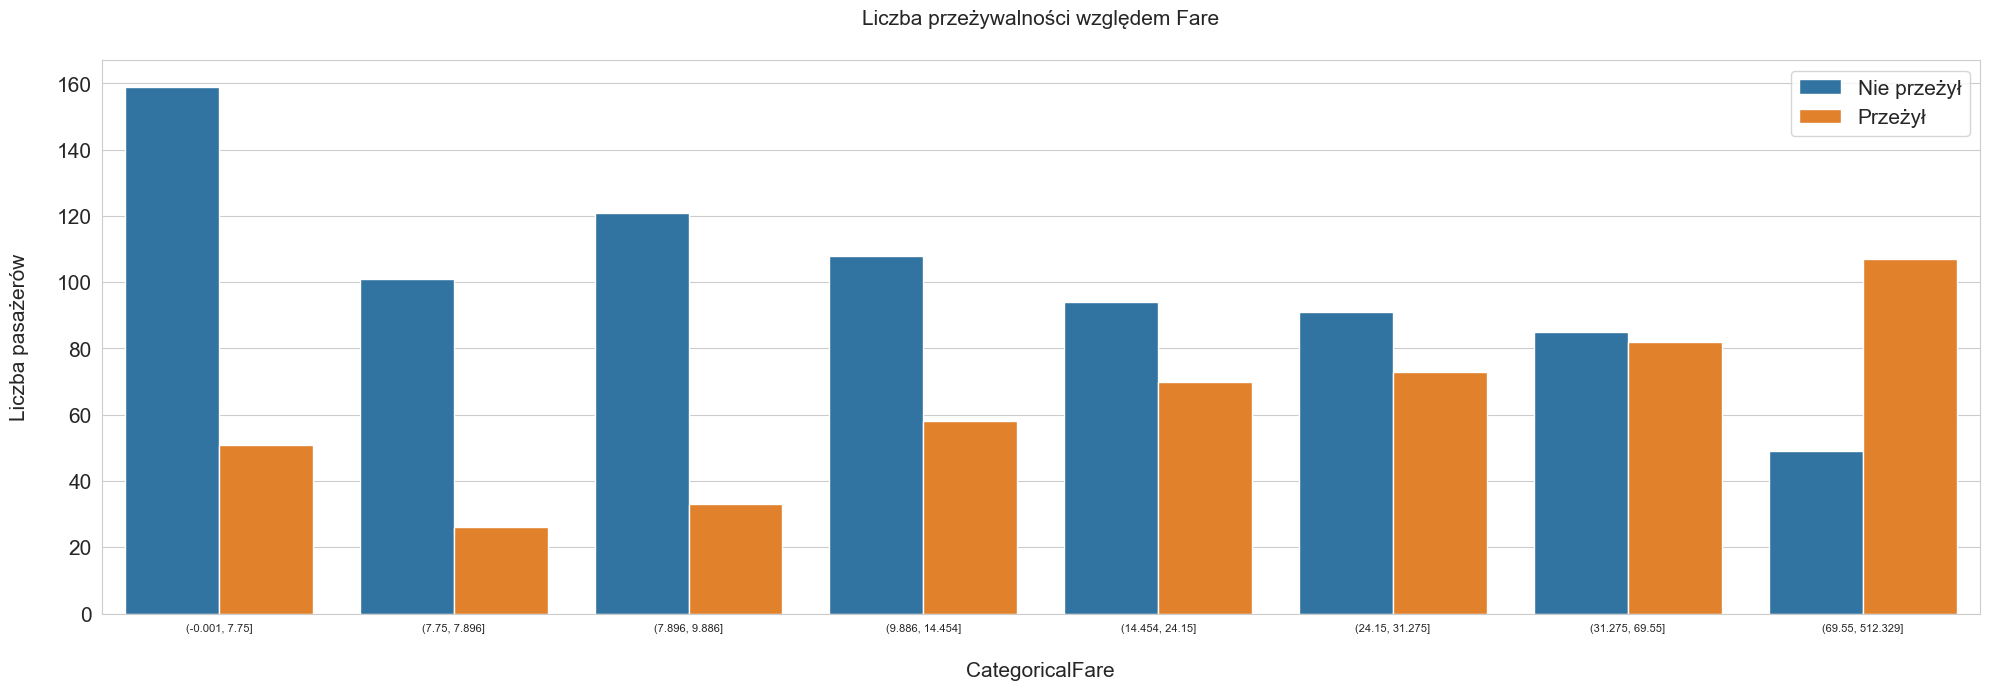

In [19]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x='CategoricalFare', hue='Survived', data=df, ax=ax)

plt.xlabel('CategoricalFare', size=15, labelpad=20)
plt.ylabel('Liczba pasażerów', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Nie przeżył', 'Przeżył'], loc='upper right', prop={'size': 15})
plt.title('Liczba przeżywalności względem Fare', size=15, y=1.05)
plt.tight_layout()
plt.show()

## 5. Trenowanie modeli

### 5.1 Drzewo decyzyjne


Zbiór treningowy
Dokładność (Accuracy): 0.8367

Zbiór testowy
Dokładność (Accuracy): 0.7786

Raport klasyfikacji:
              precision    recall  f1-score   support

 Nie przeżył       0.75      0.90      0.82       144
     Przeżył       0.84      0.63      0.72       118

    accuracy                           0.78       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.79      0.78      0.77       262



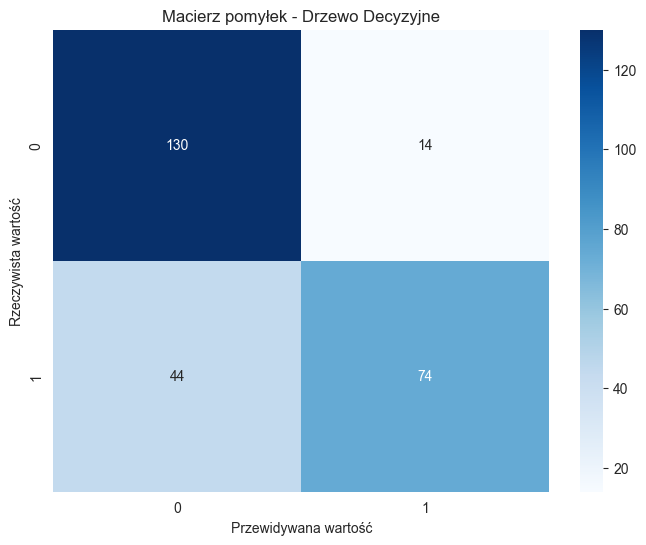

In [20]:
tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)

tree_model.fit(X_train_scaled, y_train)

# Predykcje na zbiorze treningowym i testowym
y_pred_tree_train = tree_model.predict(X_train_scaled)
y_pred_tree_test = tree_model.predict(X_test_scaled)
y_pred_tree_proba = tree_model.predict_proba(X_test_scaled)[:, 1]

acc_tree_train = accuracy_score(y_train, y_pred_tree_train)
acc_tree_test = accuracy_score(y_test, y_pred_tree_test)

print(f'\nZbiór treningowy')
print(f'Dokładność (Accuracy): {acc_tree_train:.4f}')

print(f'\nZbiór testowy')
print(f'Dokładność (Accuracy): {acc_tree_test:.4f}')

print('\nRaport klasyfikacji:')
print(classification_report(y_test, y_pred_tree_test,
                          target_names=['Nie przeżył', 'Przeżył']))

# Macierz pomyłek
cm_tree = confusion_matrix(y_test, y_pred_tree_test)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Macierz pomyłek - Drzewo Decyzyjne')
ax.set_ylabel('Rzeczywista wartość')
ax.set_xlabel('Przewidywana wartość')

plt.show()

### 5.2 Random forest


Zbiór treningowy
Dokładność (Accuracy): 0.8357

Zbiór testowy
Dokładność (Accuracy): 0.7863

Raport klasyfikacji:
              precision    recall  f1-score   support

 Nie przeżył       0.75      0.92      0.83       144
     Przeżył       0.87      0.62      0.72       118

    accuracy                           0.79       262
   macro avg       0.81      0.77      0.77       262
weighted avg       0.80      0.79      0.78       262



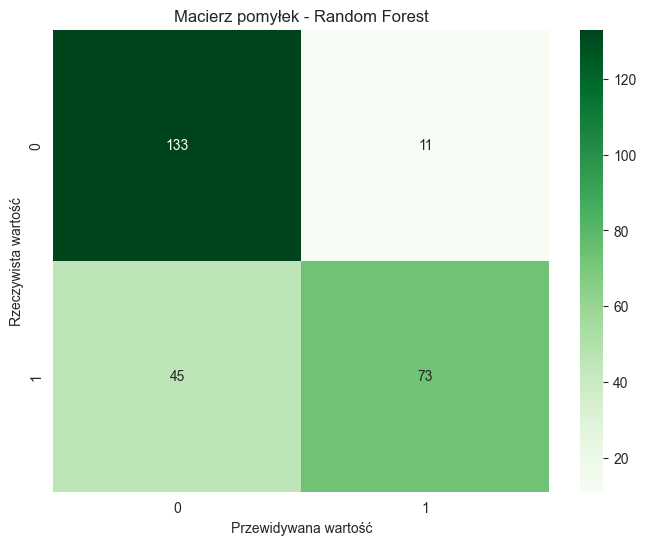

In [21]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=20,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

# Predykcje na zbiorze treningowym i testowym
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

acc_rf_train = accuracy_score(y_train, y_pred_rf_train)
acc_rf_test = accuracy_score(y_test, y_pred_rf_test)

print(f'\nZbiór treningowy')
print(f'Dokładność (Accuracy): {acc_rf_train:.4f}')

print(f'\nZbiór testowy')
print(f'Dokładność (Accuracy): {acc_rf_test:.4f}')

print('\nRaport klasyfikacji:')
print(classification_report(y_test, y_pred_rf_test,
                          target_names=['Nie przeżył', 'Przeżył']))

# Macierz pomyłek
cm_rf = confusion_matrix(y_test, y_pred_rf_test)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_title('Macierz pomyłek - Random Forest')
ax.set_ylabel('Rzeczywista wartość')
ax.set_xlabel('Przewidywana wartość')

plt.show()

### 5.3 Porównanie modeli

In [22]:
models_results = {
    'Drzewo Decyzyjne': {
        'y_pred': y_pred_tree_test,
        'y_pred_proba': y_pred_tree_proba,
        'acc_train': acc_tree_train,
        'acc_test': acc_tree_test
    },
    'Random Forest': {
        'y_pred': y_pred_rf_test,
        'y_pred_proba': y_pred_rf_proba,
        'acc_train': acc_rf_train,
        'acc_test': acc_rf_test
    }
}

comparison_data = []

for model_name, results in models_results.items():
    y_pred = results['y_pred']
    y_pred_proba = results['y_pred_proba']

    comparison_data.append({
        'Model': model_name,
        'Accuracy (Train)': results['acc_train'],
        'Accuracy (Test)': results['acc_test'],
        'Precision (Przeżył)': precision_score(y_test, y_pred),
        'Recall (Przeżył)': recall_score(y_test, y_pred),
        'F1-Score (Przeżył)': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('ROC AUC', ascending=False)

print('\nPodsumowanie wyników modeli:')
print(comparison_df.round(4).to_string(index=False))

# Określenie najlepszego modelu
best_model_name = comparison_df.iloc[0]['Model']
print(f"\nNAJLEPSZY MODEL: {best_model_name}")
print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score (Przeżył)']:.4f}")
print(f"   Accuracy (Test): {comparison_df.iloc[0]['Accuracy (Test)']:.4f}")
print(f"   ROC AUC: {comparison_df.iloc[0]['ROC AUC']:.4f}")


Podsumowanie wyników modeli:
           Model  Accuracy (Train)  Accuracy (Test)  Precision (Przeżył)  Recall (Przeżył)  F1-Score (Przeżył)  ROC AUC
   Random Forest            0.8357           0.7863               0.8690            0.6186              0.7228   0.8374
Drzewo Decyzyjne            0.8367           0.7786               0.8409            0.6271              0.7184   0.8371

NAJLEPSZY MODEL: Random Forest
   F1-Score: 0.7228
   Accuracy (Test): 0.7863
   ROC AUC: 0.8374


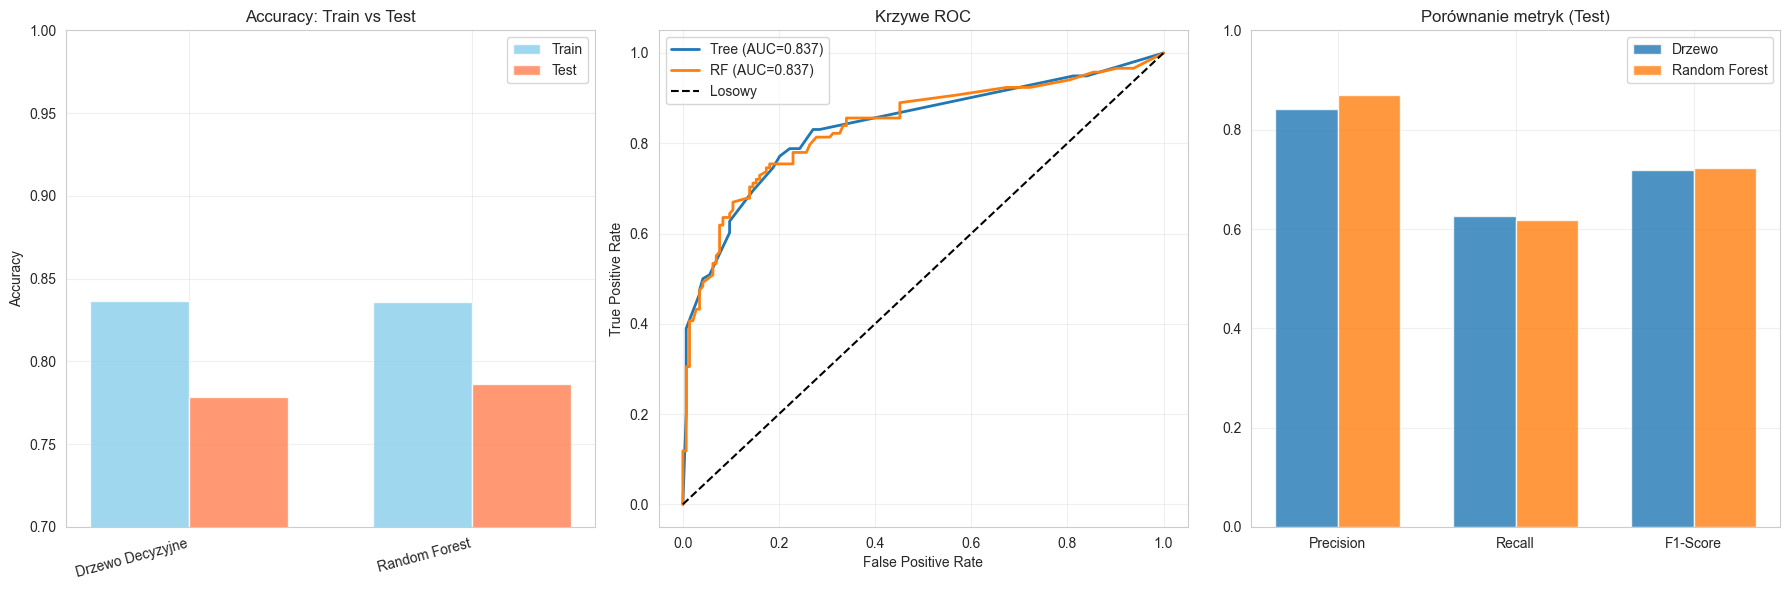

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

models_names = ['Drzewo Decyzyjne', 'Random Forest']
train_scores = [acc_tree_train, acc_rf_train]
test_scores = [acc_tree_test, acc_rf_test]
x_pos = np.arange(len(models_names))
width = 0.35

axes[0].bar(x_pos - width/2, train_scores, width, label='Train', alpha=0.8, color='skyblue')
axes[0].bar(x_pos + width/2, test_scores, width, label='Test', alpha=0.8, color='coral')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy: Train vs Test')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models_names, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0.7, 1.0])

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

axes[1].plot(fpr_tree, tpr_tree, label=f'Tree (AUC={roc_auc_score(y_test, y_pred_tree_proba):.3f})', linewidth=2)
axes[1].plot(fpr_rf, tpr_rf, label=f'RF (AUC={roc_auc_score(y_test, y_pred_rf_proba):.3f})', linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', label='Losowy')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Krzywe ROC')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

metrics_names = ['Precision', 'Recall', 'F1-Score']
x_metrics = np.arange(len(metrics_names))
tree_scores = [
    precision_score(y_test, y_pred_tree_test),
    recall_score(y_test, y_pred_tree_test),
    f1_score(y_test, y_pred_tree_test)
]
rf_scores = [
    precision_score(y_test, y_pred_rf_test),
    recall_score(y_test, y_pred_rf_test),
    f1_score(y_test, y_pred_rf_test)
]

axes[2].bar(x_metrics - width/2, tree_scores, width, label='Drzewo', alpha=0.8)
axes[2].bar(x_metrics + width/2, rf_scores, width, label='Random Forest', alpha=0.8)
axes[2].set_title('Porównanie metryk (Test)')
axes[2].set_xticks(x_metrics)
axes[2].set_xticklabels(metrics_names)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()

## 6. Future importance


           Cecha  Ważność
            Sex 0.458000
          Title 0.177329
         PClass 0.114288
           Deck 0.079651
    Family.Size 0.066646
CategoricalFare 0.042590
       Embarked 0.032936
      Age.Range 0.028561


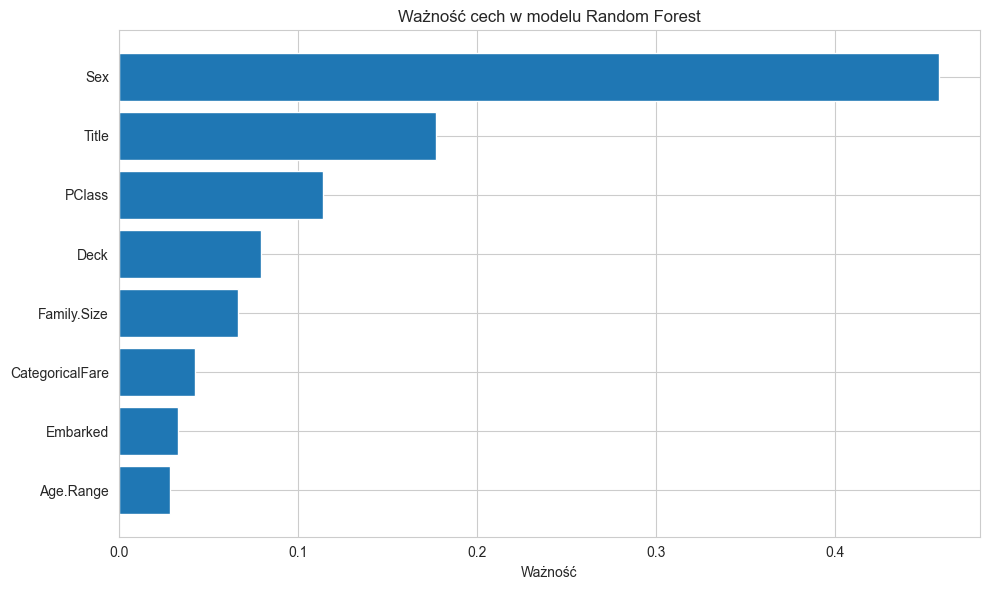

In [24]:
feature_importance = pd.DataFrame({
    'Cecha': features_to_use,
    'Ważność': rf_model.feature_importances_
}).sort_values('Ważność', ascending=False)

print("\n", feature_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Cecha'], feature_importance['Ważność'])
plt.xlabel('Ważność')
plt.title('Ważność cech w modelu Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

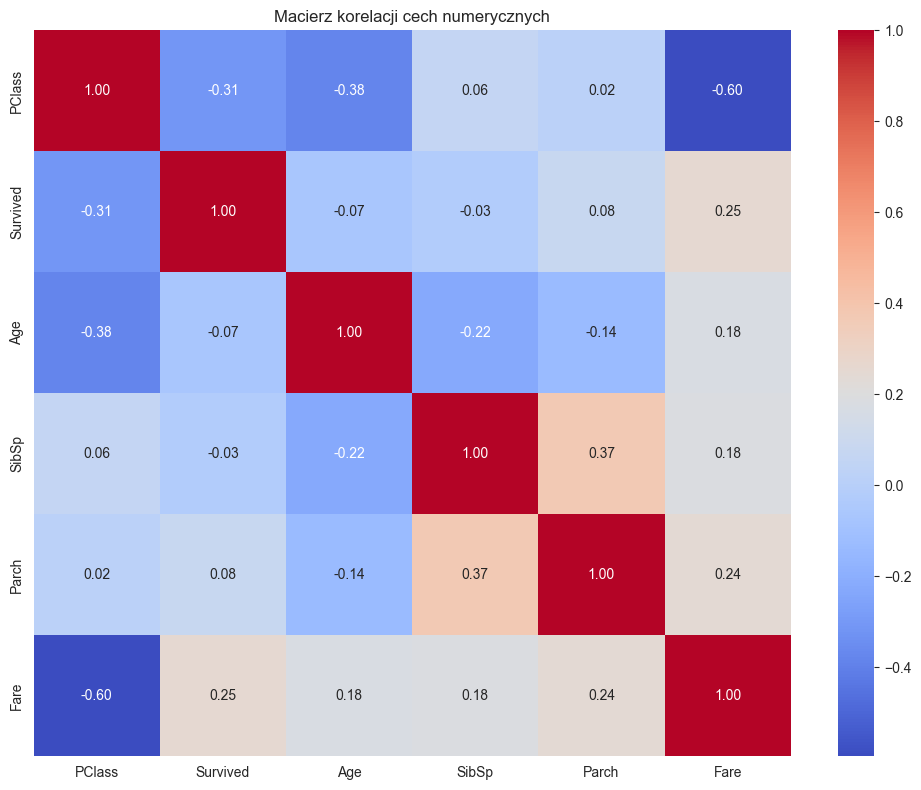


Statystyki opisowe dla cech numerycznych:
            PClass     Survived          Age        SibSp        Parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.861367     0.498854     0.385027   
std       0.837836     0.486055    13.082854     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.774207     0.000000     0.000000   
50%       3.000000     0.000000    30.000000     0.000000     0.000000   
75%       3.000000     1.000000    36.000000     1.000000     0.000000   
max       3.000000     1.000000    67.000000     8.000000     9.000000   

              Fare  
count  1309.000000  
mean     32.632257  
std      46.824315  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     300.000000  


In [25]:
### Macierz korelacji
selected_cols = ['PClass', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_cols].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji cech numerycznych')
plt.tight_layout()
plt.show()

print("\nStatystyki opisowe dla cech numerycznych:")
print(df[selected_cols].describe())